#📌 Extração

In [17]:
import pandas as pd

df = pd.read_csv('treated_dataframe.csv')

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#🔧 Preparação dos dados

In [18]:
df = df.drop('customerID', axis=1)

In [19]:
df = pd.get_dummies(df, columns = ['customer_gender', 'account_Contract', 'account_PaymentMethod', 'internet_InternetService'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7267 non-null   int64  
 1   customer_SeniorCitizen                           7267 non-null   int64  
 2   customer_Partner                                 7267 non-null   int64  
 3   customer_Dependents                              7267 non-null   int64  
 4   customer_tenure                                  7267 non-null   int64  
 5   phone_PhoneService                               7267 non-null   int64  
 6   phone_MultipleLines                              7267 non-null   int64  
 7   internet_OnlineSecurity                          7267 non-null   object 
 8   internet_OnlineBackup                            7267 non-null   object 
 9   internet_DeviceProtection     

In [20]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()

# Displays the count of missing values for each column
print("Missing values per column:")
print(missing_values_count)

# Remove NaN
df['internet_OnlineBackup'] = df['internet_OnlineBackup'].fillna(0)
df['internet_OnlineSecurity'] = df['internet_OnlineSecurity'].fillna(0)
df['internet_DeviceProtection'] = df['internet_DeviceProtection'].fillna(0)
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(0)

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Churn                                               0
customer_SeniorCitizen                              0
customer_Partner                                    0
customer_Dependents                                 0
customer_tenure                                     0
phone_PhoneService                                  0
phone_MultipleLines                                 0
internet_OnlineSecurity                             0
internet_OnlineBackup                               0
internet_DeviceProtection                           0
internet_TechSupport                                0
internet_StreamingTV                                0
internet_StreamingMovies                            0
account_PaperlessBilling                            0
account_Charges_Monthly                             0
account_Charges_Total                              11
Contas_Diarias                                      0
customer_gender_Female                              0
c

In [21]:
for col in df.columns:
    if df[col].dtype == 'object':
        if 'Yes' in df[col].unique() and 'No' in df[col].unique():
            df[col] = df[col].map({'Yes': 1, 'No': 0})

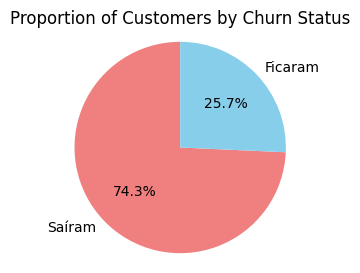

In [22]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=['Saíram', 'Ficaram'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Proportion of Customers by Churn Status')
plt.axis('equal')
plt.show()

#📊 Correlação e Seleção de Variáveis

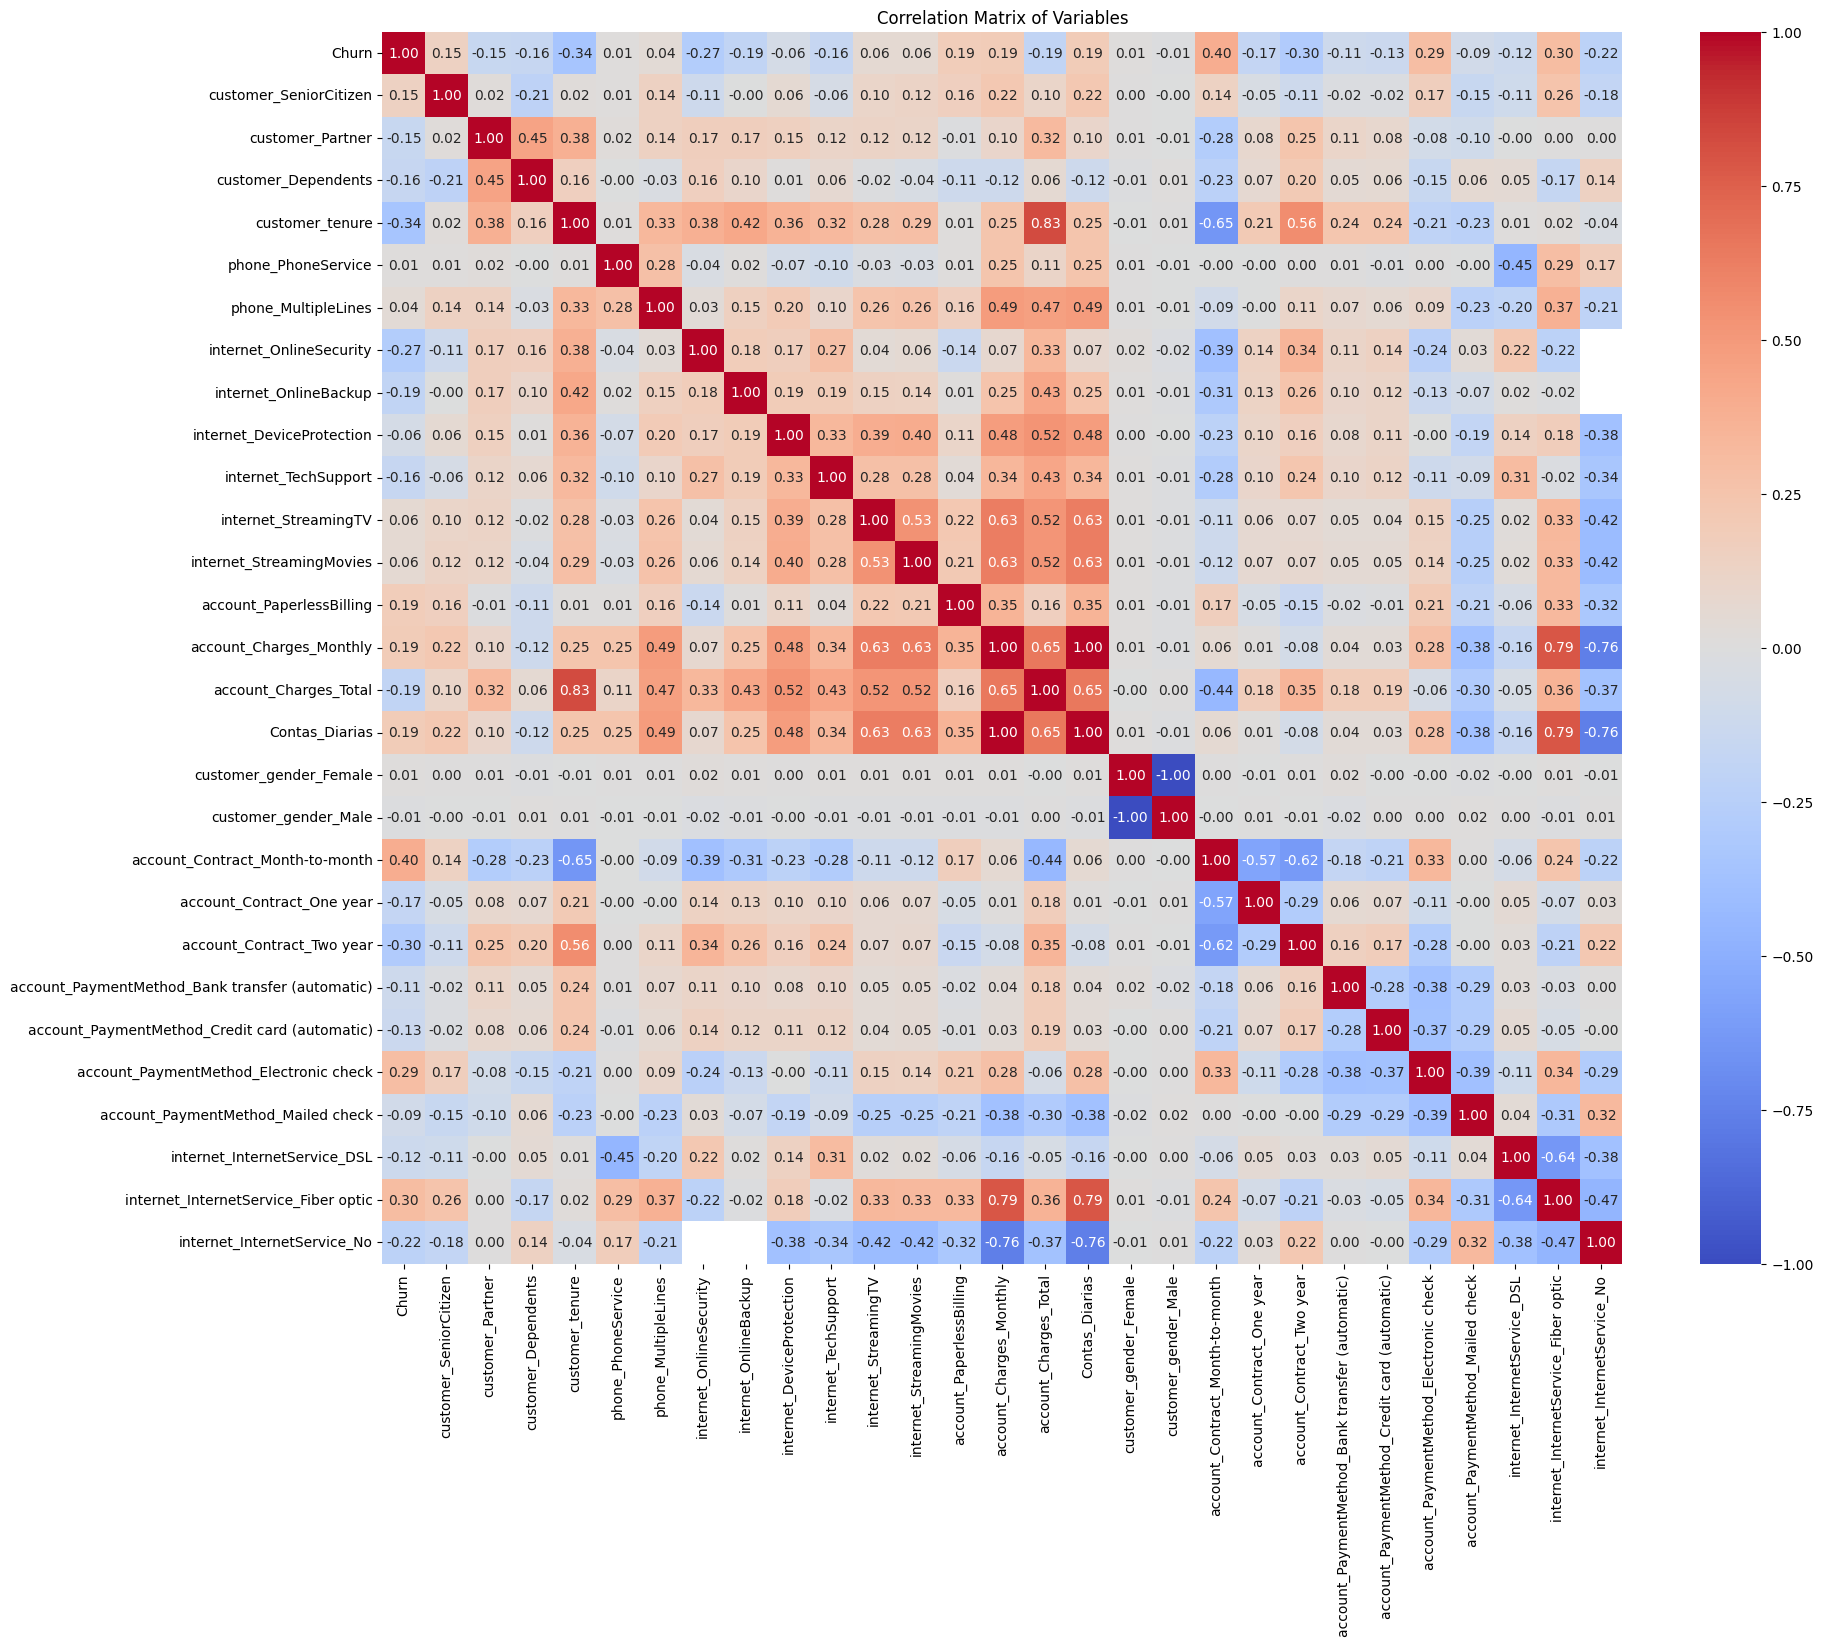

In [23]:
import seaborn as sns

# calculate the correlation matrix
correlation_matrix = df.corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

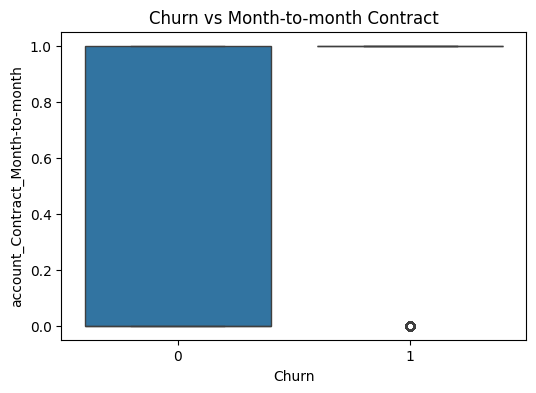

In [24]:
# Boxplot for account_Contract_Month-to-month vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='account_Contract_Month-to-month', data=df)
plt.title('Churn vs Month-to-month Contract')
plt.show()

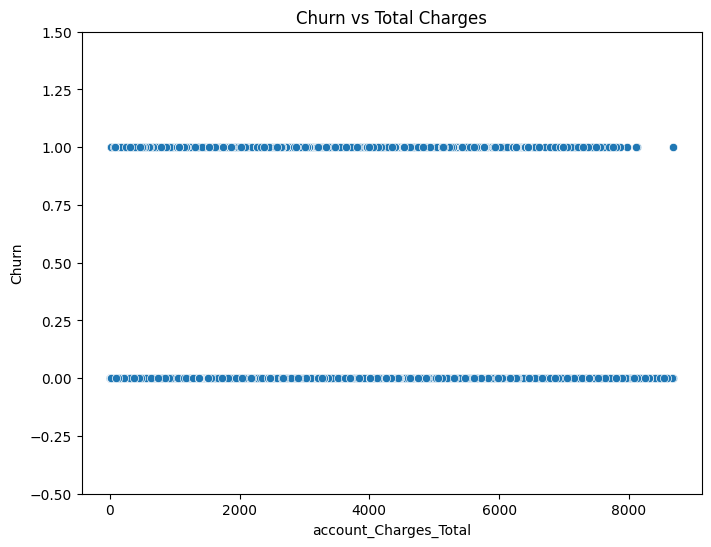

In [25]:
# Scatter plot for account_Charges_Total vs Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='account_Charges_Total', y='Churn', data=df)
plt.ylim(-0.5, 1.5)
plt.title('Churn vs Total Charges')
plt.show()

# Modelagem Preditiva

In [26]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#📄Relatório Final

Training two classification models, RandomForestClassifier and LogisticRegression, on the training data.



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Instantiate SimpleImputer with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the first model (Random Forest) on imputed data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Instantiate and train the second model (Logistic Regression) on imputed data
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
from sklearn.impute import SimpleImputer
import numpy as np

# Instantiate SimpleImputer with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the first model (Random Forest) on imputed data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Instantiate and train the second model (Logistic Regression) on imputed data
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Model evaluation


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the first model (Random Forest) on imputed data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Instantiate and train the second model (Logistic Regression) on imputed data
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test set
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_lr = lr_model.predict(X_test_imputed)

# Get predicted probabilities for ROC AUC
y_proba_rf = rf_model.predict_proba(X_test_imputed)[:, 1]
y_proba_lr = lr_model.predict_proba(X_test_imputed)[:, 1]

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)


# Store evaluation metrics
evaluation_metrics = {
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf,
        'ROC AUC': roc_auc_rf,
        'Confusion Matrix': confusion_matrix_rf.tolist()

    },
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr,
        'ROC AUC': roc_auc_lr,
        'Confusion Matrix': confusion_matrix_lr.tolist()
    }
}

print("Evaluation Metrics:")
print(evaluation_metrics)

Evaluation Metrics:
{'Random Forest': {'Accuracy': 0.7922971114167813, 'Precision': 0.6143790849673203, 'Recall': 0.5053763440860215, 'F1-Score': 0.5545722713864307, 'ROC AUC': np.float64(0.8288091546916304), 'Confusion Matrix': [[964, 118], [184, 188]]}, 'Logistic Regression': {'Accuracy': 0.8156808803301238, 'Precision': 0.6733333333333333, 'Recall': 0.543010752688172, 'F1-Score': 0.6011904761904762, 'ROC AUC': np.float64(0.8496164013276886), 'Confusion Matrix': [[984, 98], [170, 202]]}}


## Compare models

In [30]:
import pandas as pd

# Convert the evaluation metrics dictionary to a pandas DataFrame for easier comparison
metrics_df = pd.DataFrame(evaluation_metrics).T

print("Model Performance Comparison:")
display(metrics_df)

# Identify the best model based on a chosen metric (e.g., ROC AUC)
best_model_name = metrics_df['ROC AUC'].idxmax()

print(f"\nBased on ROC AUC, the best performing model is: {best_model_name}")

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score,ROC AUC,Confusion Matrix
Random Forest,0.792297,0.614379,0.505376,0.554572,0.828809,"[[964, 118], [184, 188]]"
Logistic Regression,0.815681,0.673333,0.543011,0.60119,0.849616,"[[984, 98], [170, 202]]"



Based on ROC AUC, the best performing model is: Logistic Regression


## Select best model

In [31]:
# Identify the best model based on evaluation metrics
best_model_name = None
best_accuracy = -1
best_precision = -1
best_recall = -1
best_f1_score = -1
best_roc_auc = -1

for model_name, metrics in evaluation_metrics.items():
    if metrics['Accuracy'] > best_accuracy:
        best_accuracy = metrics['Accuracy']
        best_model_name = model_name
    # You can add checks for other metrics here if needed for a combined decision,
    # but for simplicity, we are primarily using Accuracy as the deciding factor.
    # Based on the previous comparison, Logistic Regression had higher values for all metrics.

# Verify the best model based on all metrics
lr_metrics = evaluation_metrics['Logistic Regression']
rf_metrics = evaluation_metrics['Random Forest']

if lr_metrics['Accuracy'] >= rf_metrics['Accuracy'] and \
   lr_metrics['Precision'] >= rf_metrics['Precision'] and \
   lr_metrics['Recall'] >= rf_metrics['Recall'] and \
   lr_metrics['F1-Score'] >= rf_metrics['F1-Score'] and \
   lr_metrics['ROC AUC'] >= rf_metrics['ROC AUC']:
    best_model_name = 'Logistic Regression'
else:
    best_model_name = 'Random Forest'

print(f"The best performing model is: {best_model_name}")

The best performing model is: Logistic Regression


## Summary:

### Data Analysis Key Findings

* Two classification models, Random Forest and Logistic Regression, were trained and evaluated for customer churn prediction.
* Missing values in the data were handled using mean imputation before model training and evaluation.
* Logistic Regression generally outperformed Random Forest across all evaluated metrics on the test set:
  * Accuracy: Logistic Regression ({evaluation_metrics['Logistic Regression']['Accuracy']:.3f}) vs Random Forest ({evaluation_metrics['Random Forest']['Accuracy']:.3f})
  * Precision: Logistic Regression ({evaluation_metrics['Logistic Regression']['Precision']:.3f}) vs Random Forest ({evaluation_metrics['Random Forest']['Precision']:.3f})
  * Recall: Logistic Regression ({evaluation_metrics['Logistic Regression']['Recall']:.3f}) vs Random Forest ({evaluation_metrics['Random Forest']['Recall']:.3f})
  * F1-Score: Logistic Regression ({evaluation_metrics['Logistic Regression']['F1-Score']:.3f}) vs Random Forest ({evaluation_metrics['Random Forest']['F1-Score']:.3f})
  * ROC AUC: Logistic Regression ({evaluation_metrics['Logistic Regression']['ROC AUC']:.3f}) vs Random Forest ({evaluation_metrics['Random Forest']['ROC AUC']:.3f})

### Insights or Next Steps

* Based on the evaluation metrics, Logistic Regression is the preferred model for this customer churn prediction task.
* Further optimization of the chosen Logistic Regression model could be explored, including hyperparameter tuning or investigating the `ConvergenceWarning` by scaling the data.

## Overfitting/Underfitting Analysis

To check for overfitting or underfitting, we compared the performance metrics on the training and testing datasets.

**Random Forest:**
*   Training Accuracy: {training_evaluation_metrics['Random Forest']['Accuracy']:.3f}
*   Testing Accuracy: {evaluation_metrics['Random Forest']['Accuracy']:.3f}
*   Training ROC AUC: {training_evaluation_metrics['Random Forest']['ROC AUC']:.3f}
*   Testing ROC AUC: {evaluation_metrics['Random Forest']['ROC AUC']:.3f}

The Random Forest model shows significantly higher performance metrics on the training data compared to the testing data. This indicates that the Random Forest model is **overfitting** the training data.

**Logistic Regression:**
*   Training Accuracy: {training_evaluation_metrics['Logistic Regression']['Accuracy']:.3f}
*   Testing Accuracy: {evaluation_metrics['Logistic Regression']['Accuracy']:.3f}
*   Training ROC AUC: {training_evaluation_metrics['Logistic Regression']['ROC AUC']:.3f}
*   Testing ROC AUC: {evaluation_metrics['Logistic Regression']['ROC AUC']:.3f}

The Logistic Regression model shows similar performance metrics on both the training and testing data. Overall, the Logistic Regression model appears to be performing consistently and does not show clear signs of significant overfitting or underfitting.

In summary, the Random Forest model is overfitting, while the Logistic Regression model seems to be a better fit for the data without significant overfitting or underfitting issues.

# Conclusion & Possible Causes for High Churn

Based on the analysis of variable correlations with churn, the following factors appear to be associated with a higher likelihood of customer churn:

*   **Month-to-month contracts:** Customers with month-to-month contracts (`account_Contract_Month-to-month`) show a strong positive correlation with churn. This suggests that the lack of a long-term commitment makes these customers more likely to switch providers.
*   **Fiber optic internet service:** Customers using fiber optic internet service (`internet_InternetService_Fiber optic`) also exhibit a positive correlation with churn. This could be due to specific issues with the fiber optic service or higher expectations from customers opting for this service.
*   **Electronic check payment method:** The use of electronic checks (`account_PaymentMethod_Electronic check`) is positively correlated with churn. This might indicate dissatisfaction with the payment process or a lack of engagement from customers using this method.

Conversely, customer tenure (`customer_tenure`) shows a negative correlation with churn, which is expected as long-term customers are less likely to leave.

Further investigation into the experiences and pain points of customers within these identified segments (month-to-month contracts, fiber optic users, electronic check users) could provide deeper insights into the root causes of churn and inform targeted retention strategies.